# Part 3: DATA MODELING

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
cleaned_adult = pd.read_csv("cleaned_adult.csv", sep = ",")

In [3]:
# Extract Features which may be useful in prediction Income classes
data = cleaned_adult[['age','workclass','education','marital-status','sex','income']]

## Data Transform

#### Categorize Age into 4 groups: <=30, 30-45, 45-60 and >60

In [4]:
data["age"]=data["age"].apply(lambda x: "<=30" if x<=30 else
                              ("30-45" if x >30 and x<=45 else ("45-60" if x >45 and x <=60 else ">60")))
    

D:\Tools\Anacoda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [5]:
dt = data[["age","workclass","education","marital-status","sex", "income"]]
dt.head()

,age,workclass,education,marital-status,sex,income
0,45-60,Self-emp,Bachelors,Married,Male,<=50K
1,30-45,Private,HS-grad,Divorced,Male,<=50K
2,45-60,Private,Before HS,Married,Male,<=50K
3,<=30,Private,Bachelors,Married,Female,<=50K
4,30-45,Private,Post-Grad,Married,Female,<=50K


In [6]:
#dt = dt.applymap(lambda x: x.strip() if type(x) is str else x)

#### LABEL Category variables with numeric 

The purpose of this step is to using a Number which will present for a category. So that we can use Sklearn to do Data Modeling

In [7]:
def labelCategoryToNum(data, column_name, new_col):
    le = LabelEncoder()
    le.fit(data[column_name])
    data[new_col] = le.transform(data[column_name])
    return data

In [8]:
dt = labelCategoryToNum(dt,"workclass","new_workclass")

In [9]:
dt = labelCategoryToNum(dt,"education","new_education")

In [10]:
dt = labelCategoryToNum(dt,"age","new_age")

In [11]:
dt = labelCategoryToNum(dt,"marital-status","new_marital")

In [12]:
dt = labelCategoryToNum(dt,"sex","new_sex")

In [13]:
dt = labelCategoryToNum(dt,"income","new_income")

In [14]:
dt.head()

,age,workclass,education,marital-status,sex,income,new_workclass,new_education,new_age,new_marital,new_sex,new_income
0,45-60,Self-emp,Bachelors,Married,Male,<=50K,3,1,1,1,1,0
1,30-45,Private,HS-grad,Divorced,Male,<=50K,2,3,0,0,1,0
2,45-60,Private,Before HS,Married,Male,<=50K,2,2,1,1,1,0
3,<=30,Private,Bachelors,Married,Female,<=50K,2,1,2,1,0,0
4,30-45,Private,Post-Grad,Married,Female,<=50K,2,4,0,1,0,0


# DATA MODELING

In [15]:
# Draw Precision-Recall curve
from sklearn.metrics import auc
def draw_PrecRecallCurve(y_test, y_prob):
    plt.figure()
    avg_precision = average_precision_score(y_test,y_prob)
    prec, recall, thresholds = precision_recall_curve(y_test, y_prob)
    plt.step(recall, prec, color='b', alpha=0.2,
         where='post')
    #plt.fill_between(recall, prec, step='post', alpha=0.2,
     #            color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}; AUC={0:0.2f}'.format(
          avg_precision, auc(recall, prec)))
    plt.show()

In [16]:
# Draw Precision-Recall curve for K-folds in chart
def draw_PrecRecallCurveKFolds(arr_y_test, arr_y_prob):
    plt.figure()
    prec, recall, thresholds = precision_recall_curve(arr_y_test,  arr_y_prob)
    plt.plot(recall, prec, label=lab, lw=2, color='black') 
    plt.xlim([0.02, 0.99])
    plt.ylim([0, 1.05])
    plt.grid(True)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall curve, Decision Tree')
    plt.rcParams['axes.facecolor']='white'
    plt.legend(loc="lower left")
    plt.show()
    

In [17]:
# Spliting Dataset into Training and Testing
features = ["new_age","new_workclass","new_education","new_marital","new_sex"]
target = ["new_income"]
X = dt[features]
y = dt[target]
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 50)

## RandomForest Classification

In [18]:
# n_estimators is the number of trees the algorithm builds before taking the maximum voting or taking averages of predictions
# We do training a random forest from 10 decision trees and use entropy criterion as an impurity measure to split the nodes
rfc = RandomForestClassifier(random_state=50, n_estimators=10, max_features=5, criterion='entropy')
rfc.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=50, verbose=0, warm_start=False)

Average Accuracy Score 0.8258
Confusion Matrix
[[8654  641]
 [1486 1430]]
             precision    recall  f1-score   support

          0       0.85      0.93      0.89      9295
          1       0.69      0.49      0.57      2916

avg / total       0.81      0.83      0.81     12211



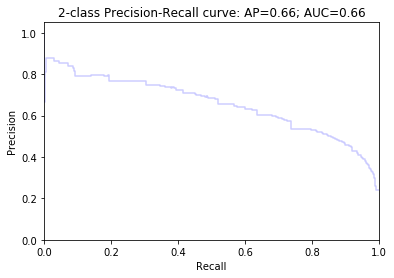

In [19]:
y_pred = rfc.predict(X_test)
#print y_pred
y_prob = rfc.predict_proba(X_test)[:,1]
print "Average Accuracy Score {0:0.4f}".format(rfc.score(X_test, y_test))
print "Confusion Matrix"
print confusion_matrix(y_test, y_pred)
print classification_report(y_test,y_pred)
draw_PrecRecallCurve(y_test, y_prob)

#### Validation

In [20]:
# Calculate Precision-Recall Score, F1-Score

def kFoldValidation(model, dataset, target, nsplits, random_state, str_classifier_name):
    kf = KFold(n_splits = nsplits, random_state = random_state)
    kf.get_n_splits(dataset)
    for i, (train_idx, test_idx) in enumerate(kf.split(dataset)): 
        print "************ Fold {0} ************".format(i)
        print "TRAIN:"+ str(train_idx)+ " TEST: "+ str(test_idx)
        X_train, X_test = dataset.loc[train_idx], dataset.loc[test_idx]
        y_train, y_test = target.loc[train_idx], target.loc[test_idx]
        model.fit(X_train, y_train.values.ravel())
        y_pred = model.predict(X_test)
        print "[fold {0} accuracy score: {1:.5f} ]".format(i+1, model.score(X_test, y_test))
        print "Confusion metric:" 
        print confusion_matrix(y_test, y_pred)
        print classification_report(y_test,y_pred)
        y_prob = model.predict_proba(X_test)
        prec, recall, thresholds = precision_recall_curve(y_test, y_prob[:,1])
        lab = 'fold %d (AUC=%0.2f)'% (i, auc(recall, prec))
        plt.plot(recall, prec, lw=1, label=lab)
        #draw_PrecRecallCurve(y_test, y_pred)
        plt.xlim([0.02, 0.99])
        plt.ylim([0, 1.05])
        plt.grid(True)
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision Recall curve - '+ str(str_classifier_name))
        plt.rcParams['axes.facecolor']='white'
        plt.legend(loc="lower left")
        

************ Fold 0 ************
TRAIN:[ 9769  9770  9771 ... 48838 48839 48840] TEST: [   0    1    2 ... 9766 9767 9768]
[fold 1 accuracy score: 0.81922 ]
Confusion metric:
[[6890  556]
 [1210 1113]]
             precision    recall  f1-score   support

          0       0.85      0.93      0.89      7446
          1       0.67      0.48      0.56      2323

avg / total       0.81      0.82      0.81      9769

************ Fold 1 ************
TRAIN:[    0     1     2 ... 48838 48839 48840] TEST: [ 9769  9770  9771 ... 19534 19535 19536]
[fold 2 accuracy score: 0.82187 ]
Confusion metric:
[[6894  534]
 [1206 1134]]
             precision    recall  f1-score   support

          0       0.85      0.93      0.89      7428
          1       0.68      0.48      0.57      2340

avg / total       0.81      0.82      0.81      9768

************ Fold 2 ************
TRAIN:[    0     1     2 ... 48838 48839 48840] TEST: [19537 19538 19539 ... 29302 29303 29304]
[fold 3 accuracy score: 0.82494

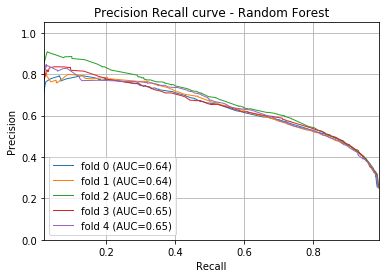

In [21]:
# Using 5-Folds Cross validation to check the result of model
kFoldValidation(rfc,X,y,5,50,"Random Forest")


## Decision Tree

Average Accuracy Score 0.8255
[[8667  628]
 [1503 1413]]
             precision    recall  f1-score   support

          0       0.85      0.93      0.89      9295
          1       0.69      0.48      0.57      2916

avg / total       0.81      0.83      0.81     12211



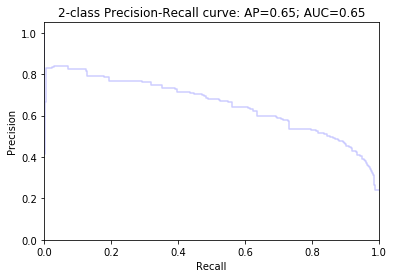

In [22]:
# Traning Decision Tree model
clf = DecisionTreeClassifier(random_state=50)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:,1]
print "Average Accuracy Score {0:0.4f}".format(clf.score(X_test, y_test))
print confusion_matrix(y_test, y_pred)
print classification_report(y_test,y_pred)
draw_PrecRecallCurve(y_test, y_prob)

In [23]:
# Export Decision Tree which are built with this model
with open('adult_tree.dot', 'w') as f:
    f = tree.export_graphviz(clf, out_file=f, feature_names= features, class_names=['<=50K','>50K'], filled = True, rounded = True,
                            special_characters=True)

#### Validation

************ Fold 0 ************
TRAIN:[ 9769  9770  9771 ... 48838 48839 48840] TEST: [   0    1    2 ... 9766 9767 9768]
[fold 1 accuracy score: 0.81974 ]
Confusion metric:
[[6900  546]
 [1215 1108]]
             precision    recall  f1-score   support

          0       0.85      0.93      0.89      7446
          1       0.67      0.48      0.56      2323

avg / total       0.81      0.82      0.81      9769

************ Fold 1 ************
TRAIN:[    0     1     2 ... 48838 48839 48840] TEST: [ 9769  9770  9771 ... 19534 19535 19536]
[fold 2 accuracy score: 0.82115 ]
Confusion metric:
[[6871  557]
 [1190 1150]]
             precision    recall  f1-score   support

          0       0.85      0.93      0.89      7428
          1       0.67      0.49      0.57      2340

avg / total       0.81      0.82      0.81      9768

************ Fold 2 ************
TRAIN:[    0     1     2 ... 48838 48839 48840] TEST: [19537 19538 19539 ... 29302 29303 29304]
[fold 3 accuracy score: 0.82545

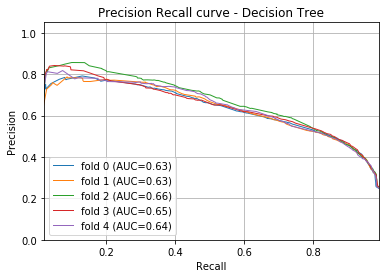

In [24]:
kFoldValidation(clf,X,y,5,50, "Decision Tree")

## KNN

##### Change n_neighbors from 3 to 10 to see what happening in KNN result 

****** K = 3 ********
Confusion Matrix
[[8083 1212]
 [1341 1575]]
             precision    recall  f1-score   support

          0       0.86      0.87      0.86      9295
          1       0.57      0.54      0.55      2916

avg / total       0.79      0.79      0.79     12211

Average Accuracy Score 0.7909
****** K = 4 ********
Confusion Matrix
[[8855  440]
 [1926  990]]
             precision    recall  f1-score   support

          0       0.82      0.95      0.88      9295
          1       0.69      0.34      0.46      2916

avg / total       0.79      0.81      0.78     12211

Average Accuracy Score 0.8062
****** K = 5 ********
Confusion Matrix
[[8068 1227]
 [1099 1817]]
             precision    recall  f1-score   support

          0       0.88      0.87      0.87      9295
          1       0.60      0.62      0.61      2916

avg / total       0.81      0.81      0.81     12211

Average Accuracy Score 0.8095
****** K = 6 ********
Confusion Matrix
[[8578  717]
 [1524 1392]]
 

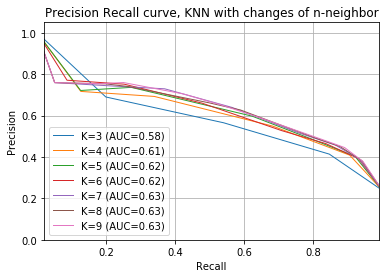

In [25]:
# Change n_neighbors from 3 to 10 to see what happening
for i in range(3,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train.values.ravel())
    y_pred = knn.predict(X_test)
    y_prob = knn.predict_proba(X_test)[:,1]
    print "****** K = {0} ********".format(i)
    print "Confusion Matrix"
    print confusion_matrix(y_test, y_pred)
    print classification_report(y_test,y_pred)
    print "Average Accuracy Score {0:0.4f}".format(knn.score(X_test, y_test))
    prec, recall, thresholds = precision_recall_curve(y_test, y_prob)
    lab = 'K=%d (AUC=%0.2f)'% (i, auc(recall, prec))
    plt.plot(recall, prec, lw=1, label=lab)
    plt.xlim([0.02, 0.99])
    plt.ylim([0, 1.05])
    plt.grid(True)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall curve, KNN with changes of n-neighbor')
    plt.rcParams['axes.facecolor']='white'
    plt.legend(loc="lower left")
    

##### Build KNN with n_neighbors =5

Average Accuracy Score 0.8284
Confusion Matrix
[[8068 1227]
 [1099 1817]]
             precision    recall  f1-score   support

          0       0.88      0.87      0.87      9295
          1       0.60      0.62      0.61      2916

avg / total       0.81      0.81      0.81     12211



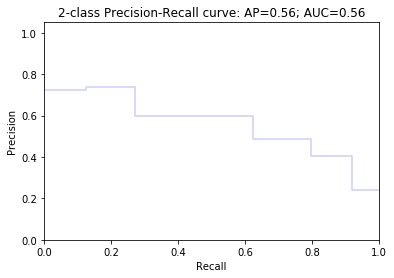

In [26]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train.values.ravel())
y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:,1]
print "Average Accuracy Score {0:0.4f}".format(clf.score(X_test, y_test))
print "Confusion Matrix"
print confusion_matrix(y_test, y_pred)
print classification_report(y_test,y_pred)
draw_PrecRecallCurve(y_test, y_prob)

##### Validation

************ Fold 0 ************
TRAIN:[ 9769  9770  9771 ... 48838 48839 48840] TEST: [   0    1    2 ... 9766 9767 9768]
[fold 1 accuracy score: 0.79251 ]
Confusion metric:
[[6426 1020]
 [1007 1316]]
             precision    recall  f1-score   support

          0       0.86      0.86      0.86      7446
          1       0.56      0.57      0.56      2323

avg / total       0.79      0.79      0.79      9769

************ Fold 1 ************
TRAIN:[    0     1     2 ... 48838 48839 48840] TEST: [ 9769  9770  9771 ... 19534 19535 19536]
[fold 2 accuracy score: 0.80180 ]
Confusion metric:
[[6477  951]
 [ 985 1355]]
             precision    recall  f1-score   support

          0       0.87      0.87      0.87      7428
          1       0.59      0.58      0.58      2340

avg / total       0.80      0.80      0.80      9768

************ Fold 2 ************
TRAIN:[    0     1     2 ... 48838 48839 48840] TEST: [19537 19538 19539 ... 29302 29303 29304]
[fold 3 accuracy score: 0.78675

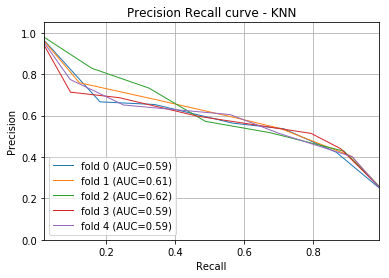

In [27]:
knn = KNeighborsClassifier(n_neighbors=5)
kFoldValidation(knn,X,y,5,50, "KNN")